<h1>HW5</h1>

# Question 1
### (Beta Distribution) Complete the following exercises 

### 1.1 

Create a function to calculate the probability density function (PDF) of  beta distribution:

\begin{equation*}
f(x;\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
\end{equation*}


* Function name: pdf_beta

* Input: $\alpha$, $\beta$, x

* Output: f(x;$\alpha$,$\beta$)

* Use SpecialFunctions.gamma() for the gamma function


In [3]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])
using SpecialFunctions

    Updating registry at `C:\Users\ahsra\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\ahsra\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\ahsra\.julia\environments\v1.8\Manifest.toml`


In [18]:
import SpecialFunctions
import Plots
import SpecialFunctions.gamma
using Plots
import Distributions as di
import Polynomials
import Random
import Statistics
using Statistics, Plots, Distributions
using Polynomials: Polynomial, fit, coeffs

In [29]:
function pdf_beta(𝛼, 𝛽, x)
    (gamma(𝛼 + 𝛽)/(gamma(𝛼) .* gamma(𝛽))) .* x^(𝛼 - 1) .* (1 - x)^(𝛽 - 1)
end

pdf_beta (generic function with 1 method)

In [12]:
# This is a test of the function
x = pdf_beta(1, 2, 3)
println(x)

-4.0


### 1.2

1. Create a x from 0 to 1 with increment of 0.001 as the probability of event. 
2. Create $\alpha$ = 0.5 and $\beta$ = 0.5
3. Calculate the pdf of the beta distribution over x 
4. Plot pdf vs. x
5. What is the shape of the beta distribution

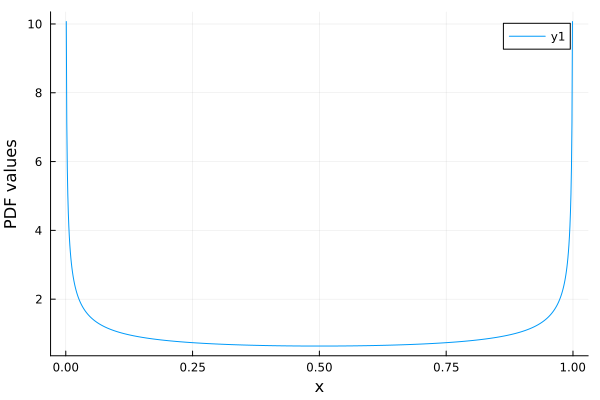

In [35]:
x = 0:0.001:1
𝛼 = 0.5
𝛽 = 0.5
pdf_values = [pdf_beta(𝛼, 𝛽, store_x) for store_x in x]
plot(x, pdf_values, xlabel = "x", ylabel = "PDF values")

The beta distribution looks like a very wide parabola, similar to a 'U' shape. 

### 1.3

1. Change $\alpha$ = 1 and $\beta$ = 1
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

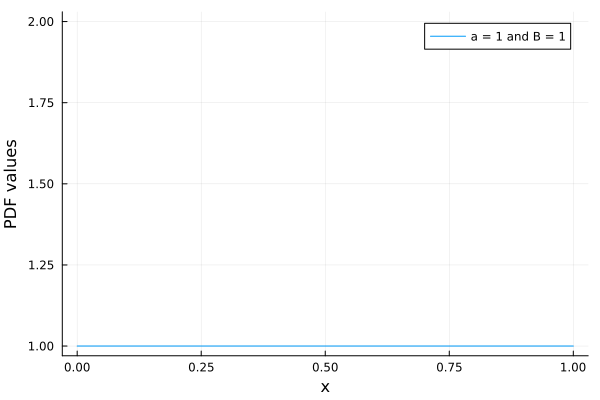

In [37]:
𝛼_1 = 1
𝛽_1 = 1
pdf_values = [pdf_beta(𝛼_1, 𝛽_1, store_x) for store_x in x]
plot(x, pdf_values, xlabel = "x", ylabel = "PDF values", label = "a = 1 and B = 1")

The beta distribution becomes a straight line at 1.

### 1.4

1. Change $\alpha$ = 5 and $\beta$ = 5
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

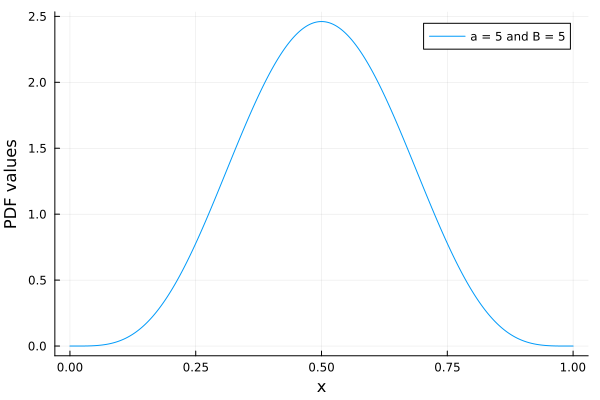

In [39]:
𝛼_5 = 5
𝛽_5 = 5
pdf_values = [pdf_beta(𝛼_5, 𝛽_5, store_x) for store_x in x]
plot(x, pdf_values, xlabel = "x", ylabel = "PDF values", label = "a = 5 and B = 5")

This beta distribution looks like a bell curve, very similar to a Gaussian distribution.

#### In our class on Tuesday, we went through how a Beta distribution is used as the conjugate prior of a binomial distribution that can be used in bayesian inference. 

If you forgot the derivation, [here is an example](https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb). 

### 1.5

#### Assume we are using the beta distribution from 1.4 as our prior distribution for a coin flipping experiment to calculate the true distribution of flipping the coin (posterior distribution).

Given the experiment results in 35 heads and 65 tails. 

1. Calculate the pdf of the posterior distribution given the prior and the results.
2. Plot pdf of the prior distribution in the same plot
3. Describe how the distribution is changed after the data came in

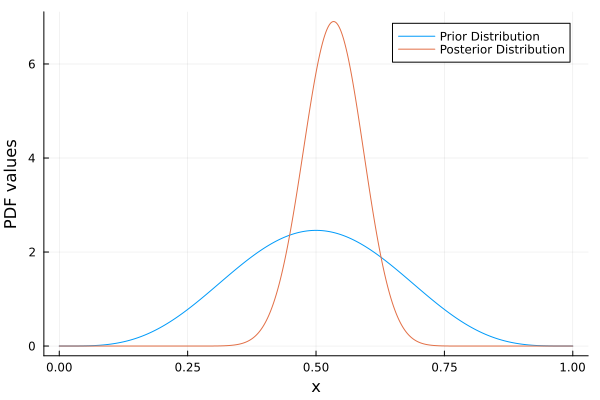

In [47]:
𝛼_5 = 5; 𝛽_5 = 5;
num_heads = 35; num_tails = 65;
pdf_values_5 = [pdf_beta(𝛼_5, 𝛽_5, store_x) for store_x in x]

pdf_post_dist = [pdf_beta(𝛼_5 + num_heads, 𝛽_5 + (num_tails - num_heads), store_x) for store_x in x]

plot(x, pdf_values_5, xlabel = "x", ylabel = "PDF values", label = "Prior Distribution")
plot!(x, pdf_post_dist, xlabel = "x", ylabel = "PDF values", label = "Posterior Distribution")

The posterior distribution is much more centralized/skinny in comparison to the prior distribution. It is slightly shifted towards the left, with the peak being around ~37.5. The posterior distribution is much taller than the prior distribution. 

# Question 2
### (Conjugate Prior) Read the following example and complete the exercises 

#### In question 1, you see when a Beta distribution is used as the prior for a event that follows a binomial distribution (P(B|A)), the posterior distribution (P(A|B)) follows a Beta distribution. Using a conjugate prior simplify the posterior computation by keeping the posterior distribution identical to the prior distribution.


### 2.1 

Gaussian distribution is a conjugate prior of itself. Below is the probability density function of gaussian distribution. Given your likelihood P(Data|Hypothesis) follows N($\mu_1$, $\sigma_1$) and prior P(Hypothesis) follows N($\mu_2$, $\sigma_2$), derive the probability density function of the posterior distribution P(Hypothesis|Data) with updated $\mu$ and $\sigma$. Please show the `whole derivation process` to earn full credit.

\begin{equation*}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
\end{equation*}

*You can ignore the marginal probability during the derivation.

\begin{equation*}
P(A|B) \propto P(B|A)P(A) 
\end{equation*}

### Hint 1
See [this page](https://jupyterbook.org/en/stable/content/math.html) for how to write equations in jupyter notebook

### Hint 2
The posterior probability is gaussian 

### Hint 3
$x^a*x^b = x^{(a+b)}$

$$
    Likelihood: P(Data|Hypothesis) = N(𝜇_{1}, 𝜎_{1})
$$

$$
    Prior: P(Hypothesis) = N(𝜇_{2}, 𝜎_{2})
$$

$$
    Posterior: P(Hypothesis|Data) ∝ P(Data|Hypothesis)⋅P(Hypothesis)
$$

$$
    P(Data|Hypothesis)⋅P(Hypothesis) = N(𝜇_{1}, 𝜎_{1})⋅N(𝜇_{2}, 𝜎_{2})
$$

$$
    N(𝜇_{1}, 𝜎_{1})⋅N(𝜇_{2}, 𝜎_{2}) = \frac{1}{\sqrt{2\pi\sigma_{1}^2}}e^{-\frac{1}{2}(\frac{x-\mu_{1}}{\sigma_{1}})^2}⋅\frac{1}{\sqrt{2\pi\sigma_{2}^2}}e^{-\frac{1}{2}(\frac{x-\mu_{2}}{\sigma_{2}})^2}
$$

Since, we are focused on the exponent only, we can disregard the normalization factors

$$
    e^{-\frac{1}{2}(\frac{x-\mu_{1}}{\sigma_{1}})^2}⋅e^{-\frac{1}{2}(\frac{x-\mu_{2}}{\sigma_{2}})^2}
$$

Since the two values are both base e, we can add the exponents and we will rewrite for simplicity. At the same time, we will distribute out a 1/𝜎

$$
    exp[-\frac{1}{2𝜎_{1}^2}(x-𝜇_{1})^2 + -\frac{1}{2𝜎_{2}^2}(x-𝜇_{2})^2]
$$

We can expand the quadratic

$$
    exp[-\frac{1}{2𝜎_{1}^2}(x^2 + 𝜇_{1}^2 - 2x𝜇_{1}) + -\frac{1}{2𝜎_{2}^2}(x^2 - 𝜇_{2}^2 - 2x𝜇_{2})]
$$

By definition, the product of two Gaussians is a Gaussian, so we can simplify as below

$$
    exp[-\frac{1}{2𝜎_{n}^2} (𝜇^2 - 2𝜇𝜇_{n} + 𝜇_{n}^2)] = exp[-\frac{1}{2𝜎_{n}^2} (𝜇 - 𝜇_{n})^2]
$$

We can then the match the coefficients of 𝜇^2 to find (𝜎_n)^2

$$
    -\frac{-𝜇^2}{2𝜎_{n}^2} = -\frac{-𝜇^2}{2}(\frac{1}{𝜎_{0}^2} + \frac{n}{𝜎^2})
$$

$$
    𝜎_{n}^2 = \frac{𝜎^2𝜎_{0}^2}{n𝜎_{0}^2 + 𝜎^2} = \frac{1}{\frac{n}{𝜎^2} + \frac{1}{𝜎_{0}^2}}
$$

We can also match coefficients of 𝜇

$$
    \frac{-2𝜇𝜇_{n}}{-2𝜎_{n}^2} = 𝜇(\frac{\sum_{i=1}^n x_{i}}{𝜎^2} + \frac{𝜇_{0}}{𝜎_{0}^2}) = \frac{𝜎_{0}^2n\bar{x} + 𝜎^2𝜇_{0}}{𝜎^2𝜎_{0}^2}
$$

By combining 𝜇 and 𝜎

$$
    𝜇_{n} = 𝜎_{n}^2[\frac{𝜇_{0}}{𝜎_{0}^2} + \frac{n\bar{x}}{𝜎^2}]
$$

Resource Used: https://www.academia.edu/37356609/Conjugate_Bayesian_analysis_of_the_Gaussian_distribution

### 2.2 

Based on the results you got in 2.1, what normalization factor is needed for the posterior to satisfy $$\int_{-\infty}^{\infty}P(A|B) = 1$$

$$
    \frac{1}{2𝝅(𝜎_{1}^2𝜎_{2}/n𝜎_{2}^2 + 𝜎_{2})}
$$